# **Assignment 5**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install geopandas libpysal esda spreg


In [3]:
import zipfile, os

base = "/content/drive/MyDrive/CSSM502/Assignment 5/Dataset"

with zipfile.ZipFile(os.path.join(base, "nhgis0001_shape.zip"), 'r') as z:
    z.extractall(os.path.join(base, "shape"))

with zipfile.ZipFile(os.path.join(base, "nhgis0001_csv.zip"), 'r') as z:
    z.extractall(os.path.join(base, "data"))


In [4]:
import geopandas as gpd

shape_dir = os.path.join(base, "shape")

# NHGIS zip yapısı derin olduğu için otomatik shp buluyoruz
shp_path = None
for root, dirs, files in os.walk(shape_dir):
    for file in files:
        if file.endswith(".shp"):
            shp_path = os.path.join(root, file)

counties = gpd.read_file(shp_path)
counties.head()



,GISJOIN,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,G0100010,01,001,00161526,01001,Autauga,Autauga County,06,H1,G4020,...,33860,None,A,1.539602e+09,2.570696e+07,+32.5322367,-086.6464395,210512.579625,1.565309e+09,"POLYGON ((895625.242 -524091.396, 895192.828 -..."
1,G0100030,01,003,00161527,01003,Baldwin,Baldwin County,06,H1,G4020,...,19300,None,A,4.117622e+09,1.132981e+09,+30.6592183,-087.7460666,635755.498872,4.264653e+09,"MULTIPOLYGON (((810181.191 -770353.651, 810167..."
2,G0100050,01,005,00161528,01005,Barbour,Barbour County,06,H1,G4020,...,21640,None,A,2.292160e+09,5.052321e+07,+31.8702531,-085.4051035,272036.648073,2.342684e+09,"POLYGON ((1026117.28 -548829.885, 1026126.521 ..."
3,G0100070,01,007,00161529,01007,Bibb,Bibb County,06,H1,G4020,...,13820,None,A,1.612167e+09,9.602089e+06,+33.0158929,-087.1271475,190850.538411,1.621770e+09,"POLYGON ((829901.363 -440039.059, 829987.487 -..."
4,G0100090,01,009,00161530,01009,Blount,Blount County,06,H1,G4020,...,13820,None,A,1.670104e+09,1.501547e+07,+33.9773575,-086.5664400,242282.033204,1.685119e+09,"POLYGON ((871831.083 -318977.32, 871844.764 -3..."


In [6]:
import pandas as pd

data_dir = os.path.join(base, "data")

csv_path = None
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)

income = pd.read_csv(csv_path)
income.head()


,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,ALPXM017,ALPXM018,ALPXM019,ALPXM020,ALPXM021,ALPXM022,ALPXM023,ALPXM024,ALPXM025,ALPXM026
0,G0100030,2019,AL,NaN,NaN,Alabama,1,Baldwin County,3,NaN,...,6580,6136,5116,3278,1176,8943,9079,8832,3708,1452
1,G0100150,2019,AL,NaN,NaN,Alabama,1,Calhoun County,15,NaN,...,3941,3816,3775,1217,604,4747,4596,4369,1682,491
2,G0100430,2019,AL,NaN,NaN,Alabama,1,Cullman County,43,NaN,...,3655,3179,2553,1626,966,3069,2891,2842,733,757
3,G0100490,2019,AL,NaN,NaN,Alabama,1,DeKalb County,49,NaN,...,3082,2368,2054,865,1227,3266,2936,2541,879,1214
4,G0100510,2019,AL,NaN,NaN,Alabama,1,Elmore County,51,NaN,...,2910,2510,2206,1193,707,4218,4206,4173,1211,386


In [7]:
# ALPXM colons
[col for col in income.columns if col.startswith("ALPXM")][:10]


['ALPXM001',
 'ALPXM002',
 'ALPXM003',
 'ALPXM004',
 'ALPXM005',
 'ALPXM006',
 'ALPXM007',
 'ALPXM008',
 'ALPXM009',
 'ALPXM010']

In [8]:
income_sub = income[["GISJOIN", "ALPXM001"]].copy()
income_sub.rename(columns={"ALPXM001": "median_income"}, inplace=True)

income_sub.head()


,GISJOIN,median_income
0,G0100030,1300
1,G0100150,1313
2,G0100430,848
3,G0100490,941
4,G0100510,1381


In [9]:
merged = counties.merge(income_sub, on="GISJOIN")
merged.head()


,GISJOIN,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry,median_income
0,G0100030,01,003,00161527,01003,Baldwin,Baldwin County,06,H1,G4020,...,None,A,4.117622e+09,1.132981e+09,+30.6592183,-087.7460666,635755.498872,4.264653e+09,"MULTIPOLYGON (((810181.191 -770353.651, 810167...",1300
1,G0100150,01,015,00161533,01015,Calhoun,Calhoun County,06,H1,G4020,...,None,A,1.569195e+09,1.658719e+07,+33.7705162,-085.8279089,218816.279550,1.585783e+09,"POLYGON ((958804.894 -345486.25, 958807.372 -3...",1313
2,G0100430,01,043,00161547,01043,Cullman,Cullman County,06,H1,G4020,...,None,A,1.902971e+09,5.252504e+07,+34.1319229,-086.8692666,244074.108909,1.955496e+09,"POLYGON ((868306.698 -314428.444, 868346.868 -...",848
3,G0100490,01,049,00161550,01049,DeKalb,DeKalb County,06,H1,G4020,...,None,A,2.012676e+09,4.121543e+06,+34.4609290,-085.8039920,226546.793917,2.016798e+09,"POLYGON ((950055.326 -269694.829, 950099.478 -...",941
4,G0100510,01,051,00161551,01051,Elmore,Elmore County,06,H1,G4020,...,None,A,1.601769e+09,9.995794e+07,+32.5972290,-086.1427347,230012.311414,1.701727e+09,"POLYGON ((943499.147 -509793.035, 943504.768 -...",1381


In [10]:
merged["median_income"].isna().sum()


np.int64(0)

<Axes: >

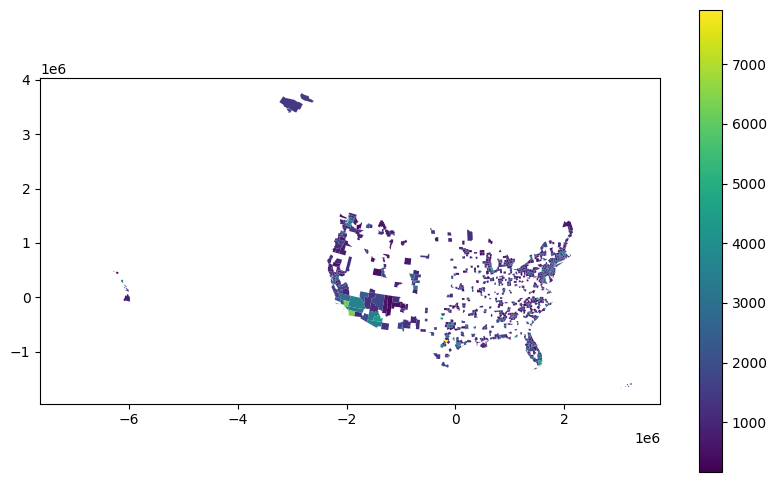

In [11]:
merged.plot(
    column="median_income",
    cmap="viridis",
    legend=True,
    figsize=(10,6)
)


In [12]:
from libpysal.weights import Queen

# Spatial weights (Queen contiguity)
w = Queen.from_dataframe(merged)

# Satır standardizasyonu
w.transform = 'R'

w


/tmp/ipython-input-1917977442.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(merged)


('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbors)')
('WARNING: ', 157, ' is an island (no neighbors)')
('WARNING: ', 165, ' is an island (no neighbors)')
('WARNING: ', 171, ' is an island (no neighbors)')
('WARNING: ', 177, ' is an island (no neighbors)')
('WARNING: ', 188, ' is an island (no neighbors)')
('WARNING: ', 189, ' is an island (no neighbors)')
('WARNING: ', 190, ' is an island (no neighbors)')
('WARNING: ', 191, ' is an island (no neighbors)')
('WARNING: ', 193, ' is an island (no neighbors)')
('WARNING: ', 194, ' is an island (no neighbors)')
('WARNING: ', 197, ' is an island (no neighbors)')
('WARNING: ', 198, ' is an island (no neighbors)')
('WARNING: ', 219, ' is an island (no

/usr/local/lib/python3.12/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 145 disconnected components.
 There are 78 islands with ids: 6, 22, 35, 42, 95, 128, 154, 157, 165, 171, 177, 188, 189, 190, 191, 193, 194, 197, 198, 219, 221, 243, 244, 245, 246, 247, 249, 256, 261, 269, 274, 277, 289, 290, 336, 346, 359, 361, 364, 367, 379, 380, 385, 393, 402, 405, 407, 450, 528, 529, 530, 531, 561, 562, 563, 573, 643, 663, 664, 672, 675, 689, 691, 716, 730, 731, 733, 735, 736, 779, 798, 799, 807, 811, 828, 829, 834, 835.
  W.__init__(self, neighbors, ids=ids, **kw)


In [13]:
from esda.moran import Moran

moran = Moran(merged["median_income"], w)
moran.I, moran.p_sim


(np.float64(0.1954456457808015), np.float64(0.001))

In [14]:
# Moran’s I is positive and statistically significant (I = 0.195, p < 0.01),
# indicating that median household income is spatially clustered across US counties.
# Counties with similar income levels tend to be located near each other.

In [15]:
import numpy as np

# dependent variable
y = merged["median_income"].values.reshape(-1, 1)

# independent variable (log area for stability)
X = np.log(merged["ALAND"].values).reshape(-1, 1)


In [16]:
from spreg import ML_Lag

lag_model = ML_Lag(
    y=y,
    x=X,
    w=w,
    name_y="Median Income",
    name_x=["Log Land Area"]
)

print(lag_model.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Median Income                Number of Observations:         840
Mean dependent var  :   1408.2524                Number of Variables   :           3
S.D. dependent var  :    857.5315                Degrees of Freedom    :         837
Pseudo R-squared    :      0.0584
Spatial Pseudo R-squared:  0.0055
Log likelihood      :  -6847.2158
Sigma-square ML     : 695481.5191                Akaike info criterion :   13700.432
S.E of regression   :    833.9553                Schwarz criterion     :   13714.632

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
--------------------------------------------------------------